In [ ]:
from model_training.Model import RNNModel
from model_training.Trainer import RNNTrainer
from model_training.Dataset import NavigationDataset
import torch
import pandas as pd
from data_generation.Environment import Environment
from data_generation.Agent import Agent
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("data/triangle_env_data.csv")
device = "cuda" if torch.cuda.is_available() else "cpu"
dataset = NavigationDataset(data)
dataloader = dataset.get_dataloader(batch_size=64, shuffle=True)
dataloader_iter = iter(dataloader)
model = RNNModel(device=device)
batch = next(dataloader_iter)
trainer = RNNTrainer(model, device=device)
trainer.train(dataloader, n_epochs=1000, verbose=True)
model.to("cpu")
with open("models/rnn_model.pkl", "wb") as f:
    pickle.dump(model, f)

Epoch 999 | Total Loss: 0.013508: 100%|██████████| 1000/1000 [6:27:23<00:00, 23.24s/it] 


FileNotFoundError: [Errno 2] No such file or directory: 'models/rnn_model.pkl'

In [9]:
model.to("cpu")
with open("models/rnn_model.pkl", "wb") as f:
    pickle.dump(model, f)

torch.Size([52, 100])


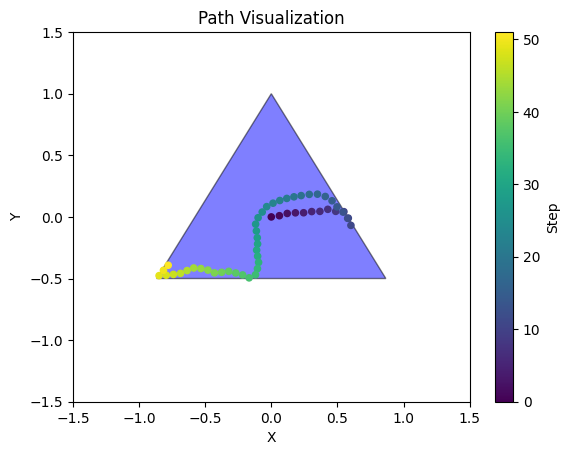

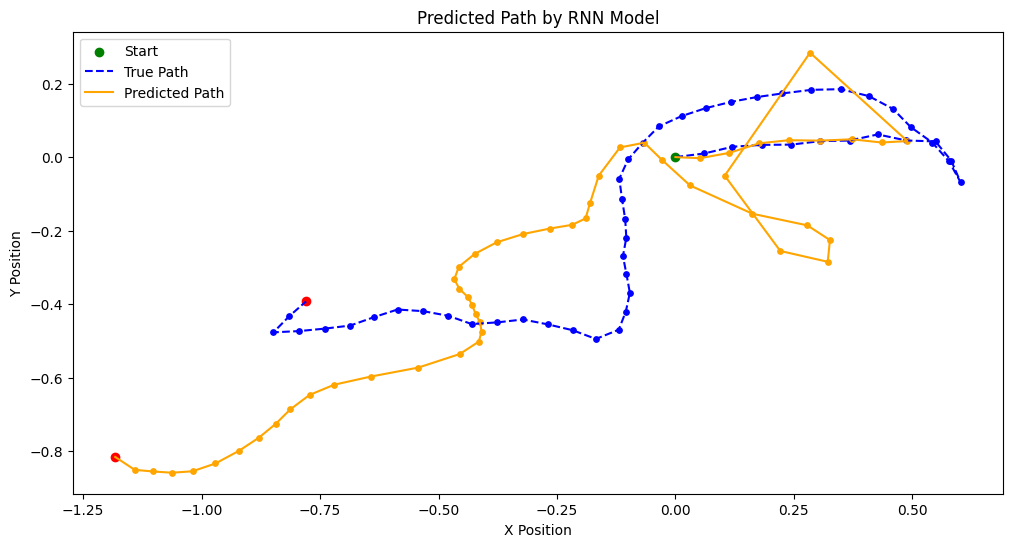

In [ ]:

# training_data = pd.read_csv("data/triangle_env_data.csv")
# training_data = NavigationDataset(training_data)

env = Environment(3, 1, 1)
agent = Agent(env, kappa=10)
for _ in range(51):
    agent.step(1)

path = agent.get_data()
# print(path.head())
path['run_id'] = 0
data = NavigationDataset(path)

# training_data_loader = training_data.get_dataloader(batch_size=1, shuffle=True)
dataloader = data.get_dataloader(batch_size=1)

model.to("cpu")
model.device = "cpu"
# predict the sample data
model.eval()
outputs = []
activations = []
with torch.no_grad():
    for batch in dataloader:
        X, Y, lengths, run_ids = batch
        X = X[0]
        Y = Y[0]
        lengths = lengths[0]
        activations, outputs = model(X, lengths)
        break

print(activations.shape)
agent.visualize_path()
# visualize the true path and predicted path

pred_path = outputs.numpy()
true_path = Y.numpy()
plt.figure(figsize=(12, 6))
plt.scatter(pred_path[0, 0], pred_path[0, 1], color='green', label='Start')
plt.plot(true_path[:, 0], true_path[:, 1], label='True Path', color='blue', linestyle='--')
plt.scatter(true_path[1:, 0], true_path[1:, 1], color='blue', s=15)
plt.plot(pred_path[:, 0], pred_path[:, 1], label='Predicted Path', color='orange')
plt.scatter(pred_path[1:, 0], pred_path[1:, 1], color='orange', s=15)
plt.scatter(pred_path[-1, 0], pred_path[-1, 1], color='red')
plt.scatter(true_path[-1, 0], true_path[-1, 1], color='red')
plt.title('Predicted Path by RNN Model')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.legend()

